DATA LOADING

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv('cyberbully2(4).csv')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91
0,ethnicity/race,@ZubearSays Any real nigga isn't letting this ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,not_cyberbullying,@MoradoSkittle @prolifejewess @DAConsult @Kell...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ethnicity/race,"the only thing i wish, i wish a nigga would",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,religion,You saudias are not friends of Muslim idiots c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,religion,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DATA CLEANING

In [5]:
#dropping columns
df.drop(columns=[f'Unnamed: {i}' for i in range(2, 92)], inplace=True)


In [6]:
df.head()

,v1,v2
0,ethnicity/race,@ZubearSays Any real nigga isn't letting this ...
1,not_cyberbullying,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,ethnicity/race,"the only thing i wish, i wish a nigga would"
3,religion,You saudias are not friends of Muslim idiots c...
4,religion,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


In [7]:
df.shape

(182191, 2)

In [8]:
#check missing values
df.isnull().sum()

v1    39
v2    13
dtype: int64

In [9]:
#renaming the columns
df.rename(columns={'v1':'target', 'v2': 'text'}, inplace=True)
df.head()

,target,text
0,ethnicity/race,@ZubearSays Any real nigga isn't letting this ...
1,not_cyberbullying,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,ethnicity/race,"the only thing i wish, i wish a nigga would"
3,religion,You saudias are not friends of Muslim idiots c...
4,religion,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


In [10]:
#filling missing values
df['target'].fillna(df['target'].mode()[0], inplace= True)
df['text'].fillna('hi', inplace= True)

In [11]:
#again checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#remove duplicates
df =df.drop_duplicates(keep='first')

In [13]:
#check duplicate values
df.duplicated().sum()#check duplicate values


0

Data Preprocessing

LABEL ASSIGNING

In [14]:
import pandas as pd

df = pd.DataFrame(df)

# Define the allowed categories and their corresponding labels
manual_labels = {
    'not_cyberbullying': 0,
    'ethnicity/race': 1,
    'gender/sexual': 2,
    'religion': 3,
    'age': 4
}

# Filter the rows to keep only the valid categories in the 'target' column
df = df[df['target'].isin(manual_labels.keys())]

# Manually assign labels based on the dictionary
df['target'] = df['target'].map(manual_labels)

# Check the result
print(df)


        target                                               text
0            1  @ZubearSays Any real nigga isn't letting this ...
1            0  @MoradoSkittle @prolifejewess @DAConsult @Kell...
2            1        the only thing i wish, i wish a nigga would
3            3  You saudias are not friends of Muslim idiots c...
4            3  @JaydenT2399 @TractorLaw @holmes_gael @erconge...
...        ...                                                ...
182186       1  Yes thats a job unlike your indians fellows co...
182187       1  Stop crying rapiests and then cry about racism...
182188       1  You guys cry about racism and injustices of In...
182189       1  Dhoti balatkari muji cmt delete gardai tei cop...
182190       1  What the fuck do you mean small eyes you fucki...

[109893 rows x 2 columns]


In [15]:
df.head()

,target,text
0,1,@ZubearSays Any real nigga isn't letting this ...
1,0,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,1,"the only thing i wish, i wish a nigga would"
3,3,You saudias are not friends of Muslim idiots c...
4,3,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


In [16]:
#check null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
#check duplicate values
df.duplicated().sum()

0

In [18]:
df.shape

(109893, 2)

In [19]:
df['target'].value_counts()

target
0    51096
2    17262
1    17201
3    16027
4     8307
Name: count, dtype: int64

In [20]:
df.tail()

,target,text
182186,1,Yes thats a job unlike your indians fellows co...
182187,1,Stop crying rapiests and then cry about racism...
182188,1,You guys cry about racism and injustices of In...
182189,1,Dhoti balatkari muji cmt delete gardai tei cop...
182190,1,What the fuck do you mean small eyes you fucki...


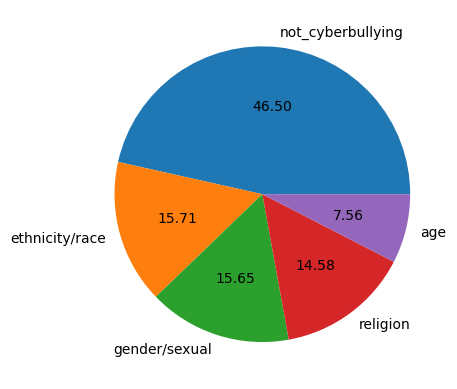

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['not_cyberbullying', 'ethnicity/race','gender/sexual', 'religion','age'], autopct="%0.2f")
plt.show()

In [22]:
from sklearn.utils import resample



In [23]:
# Separate majority (target=0) and minority classes
df_majority = df[df['target'] == 0]
df_minority = df[df['target'] != 0]


In [24]:
# Undersample majority class to match the second largest class
df_majority_downsampled = resample(
    df_majority, 
    replace=False,               # No replacement (subsampling)
    n_samples=20000,             
    random_state=42              
)


In [25]:
# Combine undersampled majority class with minority classes
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


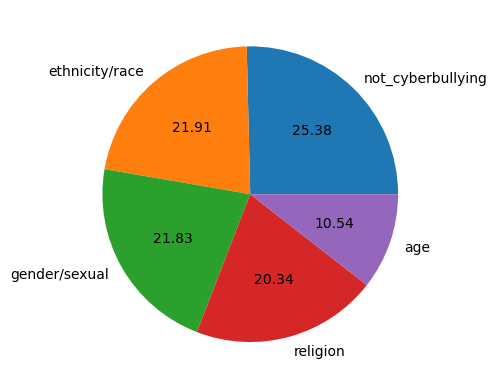

In [26]:
import matplotlib.pyplot as plt
plt.pie(df_balanced['target'].value_counts(), labels=['not_cyberbullying', 'ethnicity/race','gender/sexual', 'religion','age'], autopct="%0.2f")
plt.show()

In [27]:
!pip install contractions

In [30]:
import re
import emoji
import contractions

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove mentions (@user) and hashtags (#topic)
    text = re.sub(r'@\w+|#\w+', '', text)

    # Convert emojis to text
    text = emoji.demojize(text)  # 😊 → :smiling_face_with_smiling_eyes:
    text = text.replace(":", " ")  # Remove colons (:)

    # Expand contractions (e.g., "don't" → "do not")
    text = contractions.fix(text)

    # Keep only alphanumeric characters (remove special characters, but keep spaces)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Example 
sample_text = "Hey @User123, check this out! 😊 Visit https://example.com #cool #AI Don't worry!"
cleaned_text = clean_text(sample_text)
print(cleaned_text)



hey check this out smilingfacewithsmilingeyes visit do not worry


In [31]:
# Data Transformation
df_balanced['clean_text'] = df_balanced['text'].apply(clean_text) 

In [32]:
sample_text= " hey you do not click on this link 😊 Visit https://example.com #cool #AI bitch"
print(clean_text(sample_text))


hey you do not click on this link smilingfacewithsmilingeyes visit bitch


In [33]:
from transformers import BertTokenizer

# Initialize Bert tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize text
encodings = tokenizer(
    list(df_balanced['clean_text']),            # Text column
    truncation=True,             # Truncate sequences longer than max_length
    padding=True,                # Pad shorter sequences
    max_length=256,              # Maximum sequence length
    stride=64,                  #overlap between chunks                       
                              
    return_tensors="pt"          # Return PyTorch tensors
)



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [34]:
print(len(encodings['input_ids']), len(encodings['attention_mask']), len(df_balanced['target']))


78797 78797 78797


In [ ]:
from datasets import Dataset
import torch

# Prepare labels
labels = torch.tensor(df_balanced['target'].values.tolist(), dtype=torch.long)

# Create a Hugging Face Dataset
dataset = Dataset.from_dict({
    'input_ids': encodings['input_ids'],
    'attention_mask': encodings['attention_mask'],
    'labels': labels.tolist()
})




In [ ]:
# Split into training and testing datasets
train_test_split = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = train_test_split['train']
test_dataset = train_test_split['test']

Data Visualization

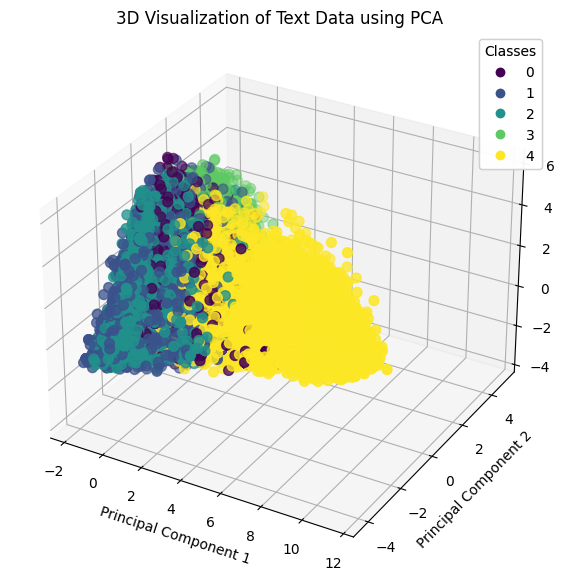

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=100)  # Limit features for simplicity
X = vectorizer.fit_transform(df_balanced['clean_text']).toarray()

# Standardize features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Plotting in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot using different colors for each target class
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df_balanced['target'], cmap='viridis', s=50)

# Add legend and labels
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)

ax.set_title('3D Visualization of Text Data using PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


word cloud visualization

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=800, height=400, min_font_size=10, background_color='white')

In [ ]:
not_cyberbullying_wc = wc.generate(df_balanced[df_balanced['target'] == 0]['clean_text'].str.cat(sep=" "))

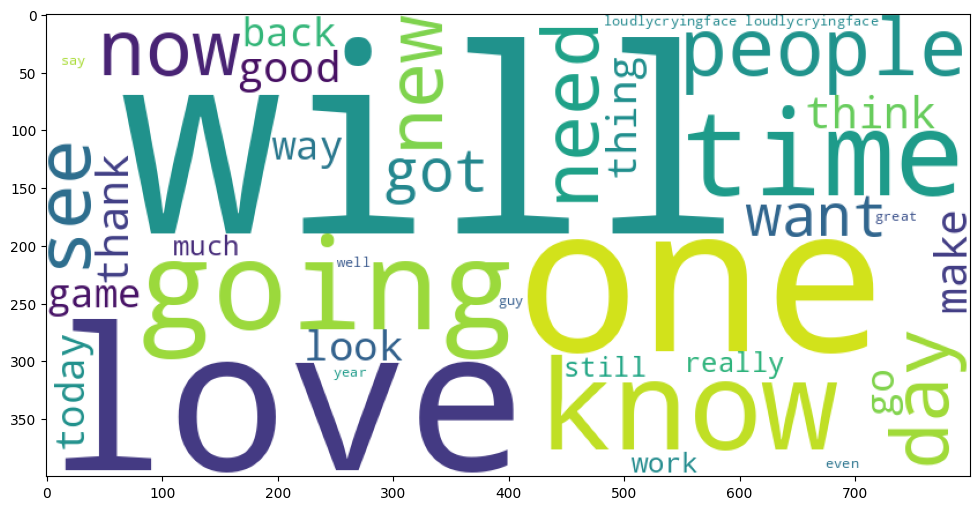

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(not_cyberbullying_wc)

In [ ]:
ethnicity_wc = wc.generate(df_balanced[df_balanced['target'] == 1]['clean_text'].str.cat(sep=" "))

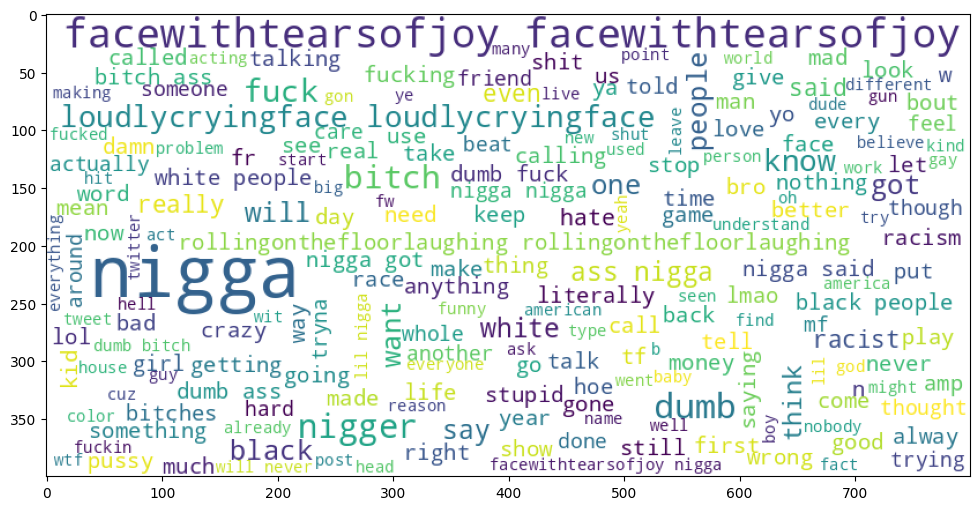

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ethnicity_wc)

In [ ]:
gender_wc = wc.generate(df_balanced[df_balanced['target'] == 2]['clean_text'].str.cat(sep=" "))

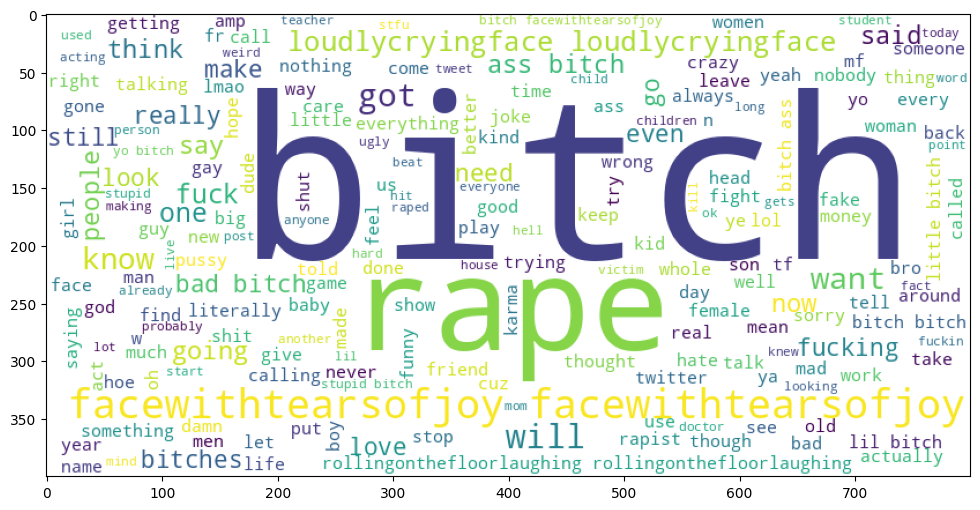

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(gender_wc)

In [ ]:
religion_wc= wc.generate(df_balanced[df_balanced['target'] == 3]['clean_text'].str.cat(sep=" "))

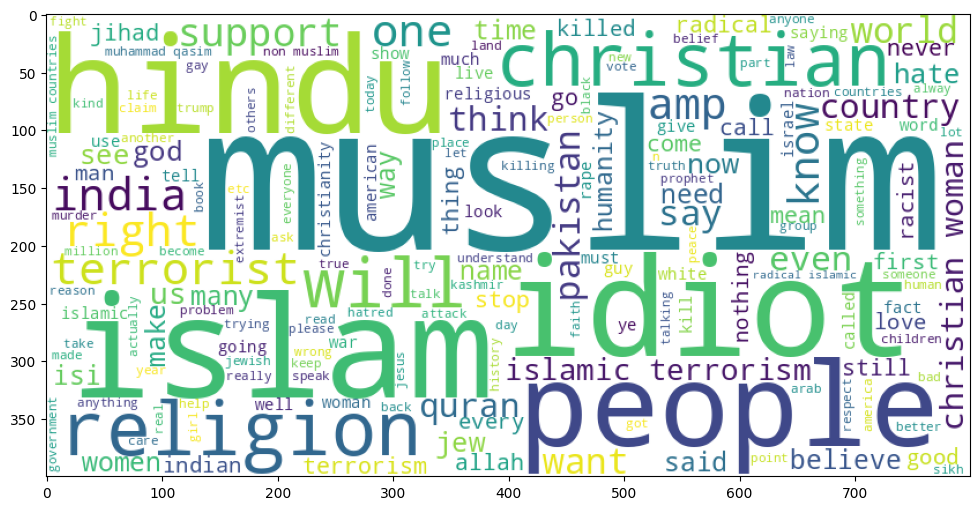

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(religion_wc)

In [ ]:
from wordcloud import WordCloud

age_wc= wc.generate(df_balanced[df_balanced['target'] == 4]['clean_text'].str.cat(sep=" "))


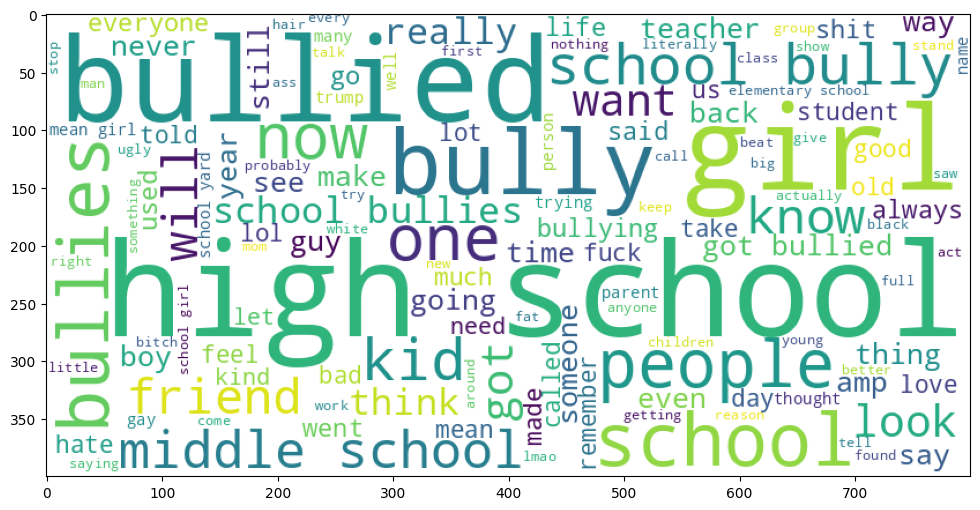

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(age_wc)

word corpus

In [ ]:
not_cyberbullying_corpus = []
for msg in df_balanced[df_balanced['target']== 0]['clean_text'].tolist():
    for word in msg.split():
        not_cyberbullying_corpus.append(word)

In [ ]:
len(not_cyberbullying_corpus)

325238

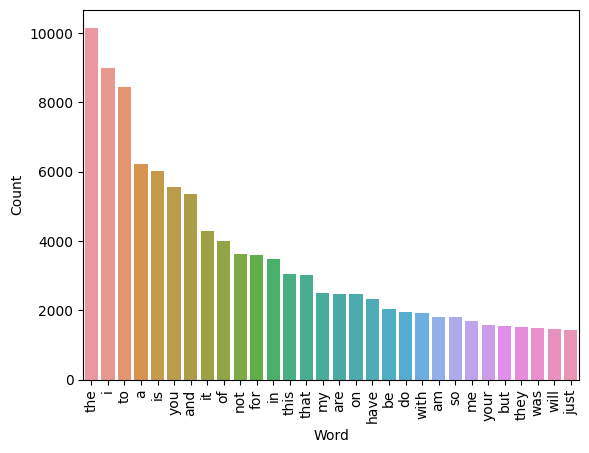

In [ ]:
import seaborn as sns

from collections import Counter



not_cyberbullying_counter = Counter(not_cyberbullying_corpus)
not_cyberbullying_df = pd.DataFrame(not_cyberbullying_counter.most_common(30), columns=['Word', 'Count'])

# Correct usage of sns.barplot()
sns.barplot(x='Word', y='Count', data=not_cyberbullying_df)

plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
ethnicity_corpus = []
for msg in df_balanced[df_balanced['target']== 1]['clean_text'].tolist():
    for word in msg.split():
        ethnicity_corpus.append(word)

In [ ]:
len(ethnicity_corpus)

347784

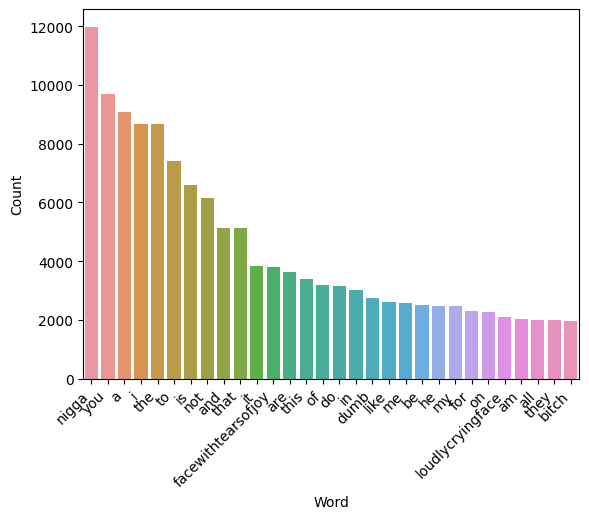

In [ ]:

ethnicity_counter = Counter(ethnicity_corpus)
ethnicity_df = pd.DataFrame(ethnicity_counter.most_common(30), columns=['Word', 'Count'])

# Correct usage of sns.barplot()
sns.barplot(x='Word', y='Count', data=ethnicity_df)
plt.xticks(rotation=45, ha="right")

# plt.xticks(rotation='horizontal')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
gender_corpus = []
for msg in df_balanced[df_balanced['target']== 2]['clean_text'].tolist():
    for word in msg.split():
        gender_corpus.append(word)

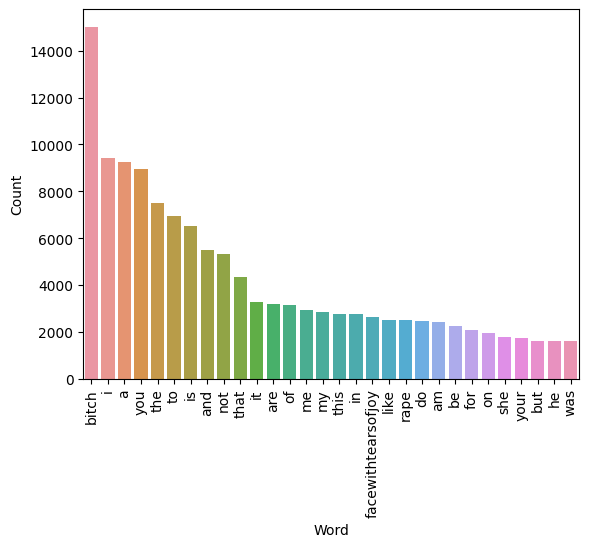

In [ ]:

gender_counter = Counter(gender_corpus)
gender_df = pd.DataFrame(gender_counter.most_common(30), columns=['Word', 'Count'])

# Correct usage of sns.barplot()
sns.barplot(x='Word', y='Count', data=gender_df)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
religion_corpus = []
for msg in df_balanced[df_balanced['target']== 3]['clean_text'].tolist():
    for word in msg.split():
        religion_corpus.append(word)

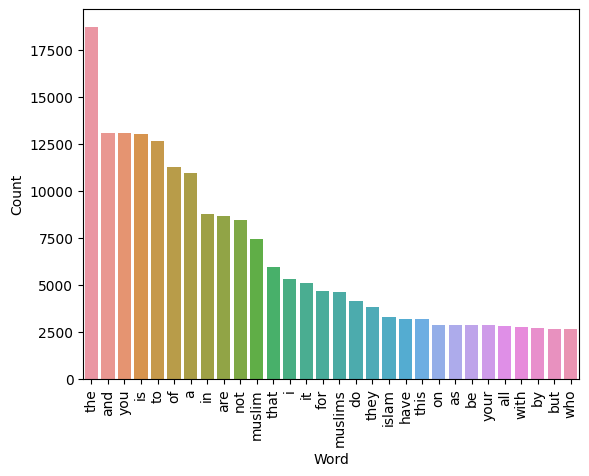

In [ ]:
religion_counter = Counter(religion_corpus)
religion_df = pd.DataFrame(religion_counter.most_common(30), columns=['Word', 'Count'])

# Correct usage of sns.barplot()
sns.barplot(x='Word', y='Count', data=religion_df)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
age_corpus = []
for msg in df[df['target']== 4]['clean_text'].tolist():
    for word in msg.split():
        age_corpus.append(word)

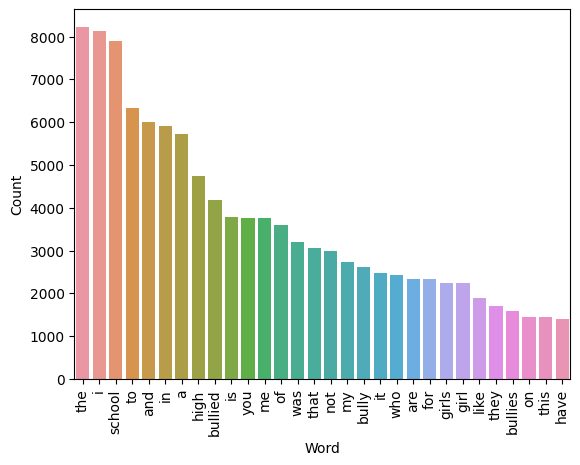

In [ ]:
age_counter = Counter(age_corpus)
age_df = pd.DataFrame(age_counter.most_common(30), columns=['Word', 'Count'])

# Correct usage of sns.barplot()
sns.barplot(x='Word', y='Count', data=age_df)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()

For DashBoard

In [ ]:
!pip install wandb

In [ ]:
import wandb
wandb.login(key="281938f368d5b02fb5c0ab62c92d96f1b35ede3c")



wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: 077bei046 (077bct066-techzhub). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
wandb.init(project="Cyberbullying_detection_xlnet")


Model Training


In [ ]:
!pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
# Define accuracy metric
import evaluate
metric = evaluate.load("accuracy")


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return metric.compute(predictions=predictions, references=labels)


In [ ]:
from transformers import BertForSequenceClassification

# Load the model
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(df_balanced['target'].unique())  # Number of target labels
)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments
train_dataset = train_dataset.shuffle(seed=42)

training_args = TrainingArguments(
    output_dir="./bert_results",     
    evaluation_strategy="epoch",       # Evaluate after every epoch
    run_name="bert_cyberbullying_run", 
    learning_rate=2e-5,               
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,     
    num_train_epochs=4,      
    gradient_accumulation_steps=4,  # Accumulate gradients over 4 steps
              
    weight_decay=0.01,                # Weight decay
    logging_dir="./logs",             # Log directory
    logging_steps=10,                 # Log every 10 steps
    save_strategy="epoch",            # Save model at the end of each epoch
    save_total_limit=2,              # Keep only last 2 checkpoints
    max_steps=4000,  # Limit training to 3000 steps
    report_to=["wandb"]

)


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,                     # Model to train
    args=training_args,              # Training arguments
    train_dataset=train_dataset,     # Training data
    eval_dataset=test_dataset,        # Validation data
    compute_metrics=compute_metrics  # Add this line to get accuracy
)

# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.032500,0.045733,0.989023
2,0.027700,0.049734,0.989911
3,0.001100,0.056392,0.989657
4,0.009000,0.052210,0.990863


TrainOutput(global_step=4000, training_loss=0.0498278377482784, metrics={'train_runtime': 7746.5107, 'train_samples_per_second': 33.047, 'train_steps_per_second': 0.516, 'total_flos': 3.3677543526537216e+16, 'train_loss': 0.0498278377482784, 'epoch': 4.060913705583756})

Evaluation

In [ ]:
results = trainer.evaluate()
print("Evaluation Results:", results)


Evaluation Results: {'eval_loss': 0.05221012979745865, 'eval_accuracy': 0.9908629441624366, 'eval_runtime': 156.0798, 'eval_samples_per_second': 100.974, 'eval_steps_per_second': 6.311, 'epoch': 4.060913705583756}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Predictions and true labels
predictions = trainer.predict(test_dataset)  # Run predictions on the test dataset
predicted_labels = predictions.predictions.argmax(axis=1)  # Get the predicted label for each sample
true_labels = predictions.label_ids  # True labels

# Accuracy Score
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

# Precision Score
precision = precision_score(true_labels, predicted_labels, average='weighted')  # Use 'weighted' for multi-class
print(f"Precision: {precision:.4f}")



# Classification Report
class_report = classification_report(true_labels, predicted_labels, target_names=list(manual_labels.keys()))
print("Classification Report:")
print(class_report)


Accuracy: 0.9909
Precision: 0.9909
Classification Report:
                   precision    recall  f1-score   support

not_cyberbullying       0.98      0.98      0.98      4011
   ethnicity/race       1.00      1.00      1.00      3397
    gender/sexual       1.00      1.00      1.00      3447
         religion       0.99      0.99      0.99      3286
              age       0.98      0.99      0.99      1619

         accuracy                           0.99     15760
        macro avg       0.99      0.99      0.99     15760
     weighted avg       0.99      0.99      0.99     15760



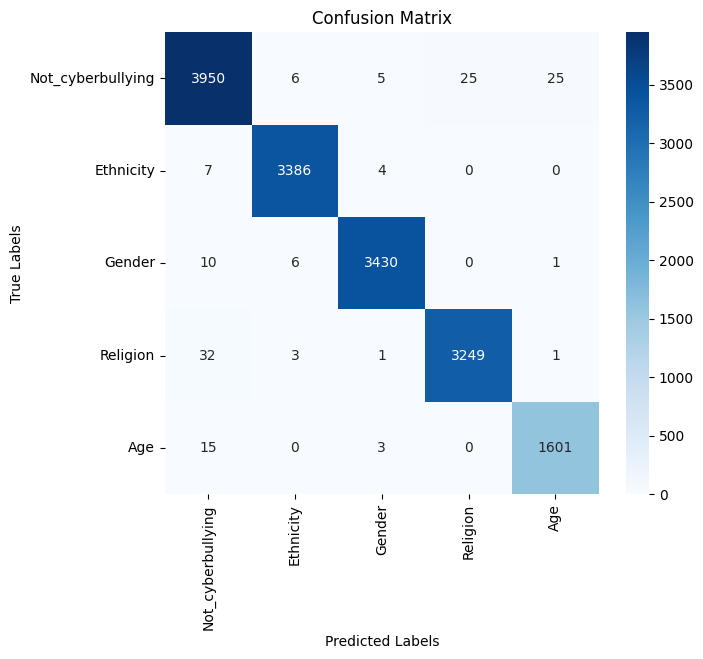

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class labels dynamically
class_labels = ["Not_cyberbullying", "Ethnicity", "Gender", "Religion", "Age"]  

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the heatmap
plt.figure(figsize=(7, 6))  
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


#🔹 Diagonal values (3942, 3387, 3424, 3246, 1601) → Correct predictions (True Positives for each class)
#🔹 Non-diagonal values → Misclassifications


In [ ]:
trainer.save_model("./fine_tuned_bert")


In [ ]:

SAVE_DIR = "./bert_results/"
model.save_pretrained(SAVE_DIR)
tokenizer.save_pretrained(SAVE_DIR)

('./bert_results/tokenizer_config.json',
 './bert_results/special_tokens_map.json',
 './bert_results/vocab.txt',
 './bert_results/added_tokens.json')

In [ ]:
import os

# Create a folder to save your output
output_dir = "./trained_model"
os.makedirs(output_dir, exist_ok=True)

# Save outputs (model, tokenizer, etc.)
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)


('./trained_model/tokenizer_config.json',
 './trained_model/special_tokens_map.json',
 './trained_model/vocab.txt',
 './trained_model/added_tokens.json')

In [ ]:
import shutil

# Compress the folder into a zip file
shutil.make_archive("trained_model", 'zip', output_dir)


'/kaggle/working/trained_model.zip'

In [ ]:
# def predict(text):
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Determine the device
#     model.to(device)  # Ensure the model is on the correct device
#     inputs = tokenizer(text, truncation=True, padding=True, max_length=128, return_tensors="pt")
#     inputs = {key: value.to(device) for key, value in inputs.items()}  # Move inputs to the same device as the model
#     outputs = model(**inputs)
#     prediction = torch.argmax(outputs.logits, dim=1)
#     return prediction.item()

# # Test with a new input
# # new_text = [
# #     'You look good buddy',
# #     # 'Go to jail, nigga!!',
# #     # 'Everyone loves your posts',
# #     # 'Americans are dumb people.',
# #     # 'I hate your fucking god.'
# # ]
# new_text = "female dog is bitch"
# predicted_label = predict(new_text)
# print("Predicted Label:", predicted_label)

# # predicted_labels = predict(new_text)
# # for text, label in predicted_labels:
# #     print(f"Text: {text}\nPredicted Label: {label}\n")
